Good afternoon, everyone!

How can we leverage clustering to develop effective strategies for our credit card customers? Today, we're here to explore this question and unlock the potential hidden within the vast world of credit card data.

Credit cards play a significant role for banks, not only as a brand awareness strategy but also as a revenue-generating exercise. By issuing credit cards, banks empower users with additional purchasing power, allowing them to meet their needs and repay the bank without incurring interest.

But here's the catch: not everyone thinks alike. Not everyone has the ability to pay their dues on time or considers budgeting their expenses. Some customers choose to pay only the minimum amount due, keeping their credit card balances revolving. This presents a unique opportunity for banks to generate revenue through interest payments, provided they can effectively manage risk and develop tailored strategies in collaboration with their marketing teams.

Today, we're going to dive into a real-world dataset and explore how we can uncover clusters or groups of customers based on their credit card behavior. By understanding these clusters, we can gain valuable insights into customer spending habits and develop targeted strategies that maximize engagement and drive business growth.

So, enough talk and theoretical knowledge! Let's roll up our sleeves, dive into the data, and discover the fascinating world of credit card customer clustering."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
df   = pd.read_csv(r"C:\Users\Nihaa\Documents\PGA19 Machine Learning\Exam\25 Machine Learning Question Paper 2 with datasets\credit_card.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

By utilizing these basic EDA methods, I have gain initial insights into the dataset's structure, variable types, missing values, statistical summaries, and overall size.

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.shape

(8950, 18)

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
def mean_imputation(data):
    column_means = data.mean()
    
    for column in data.columns[data.isnull().any()]:
        data[column].fillna(column_means[column], inplace=True)
    
    return data

df_imputed = mean_imputation(df)


In [8]:
df_imputed.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Further exploring the data:

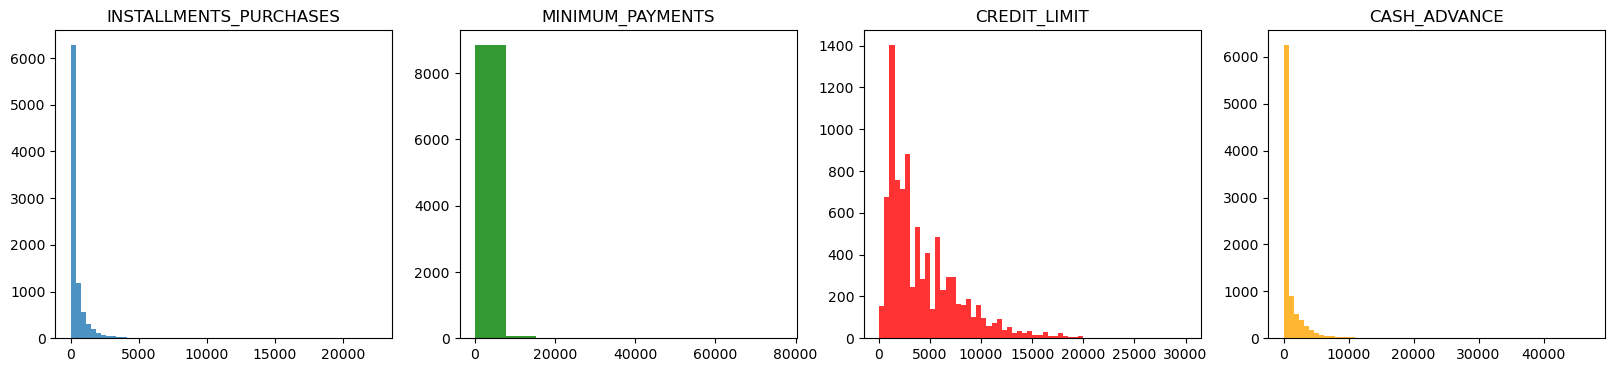

In [9]:
fig, ax = plt.subplots(1,4,figsize =(20,4))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(df['INSTALLMENTS_PURCHASES'], bins = 60, alpha =0.8 )
ax1.hist(df['MINIMUM_PAYMENTS'], bins = 10, color="green" ,alpha =0.8 )
ax2.hist(df['CREDIT_LIMIT'], bins = 60, color="red",alpha =0.8 )
ax3.hist(df['CASH_ADVANCE'], bins = 60, color="orange",alpha =0.8 )

ax0.set_title("INSTALLMENTS_PURCHASES")
ax1.set_title("MINIMUM_PAYMENTS")
ax2.set_title("CREDIT_LIMIT")
ax3.set_title("CASH_ADVANCE")

plt.show()

we utilize scatter plot which show us there are outliers present in the data

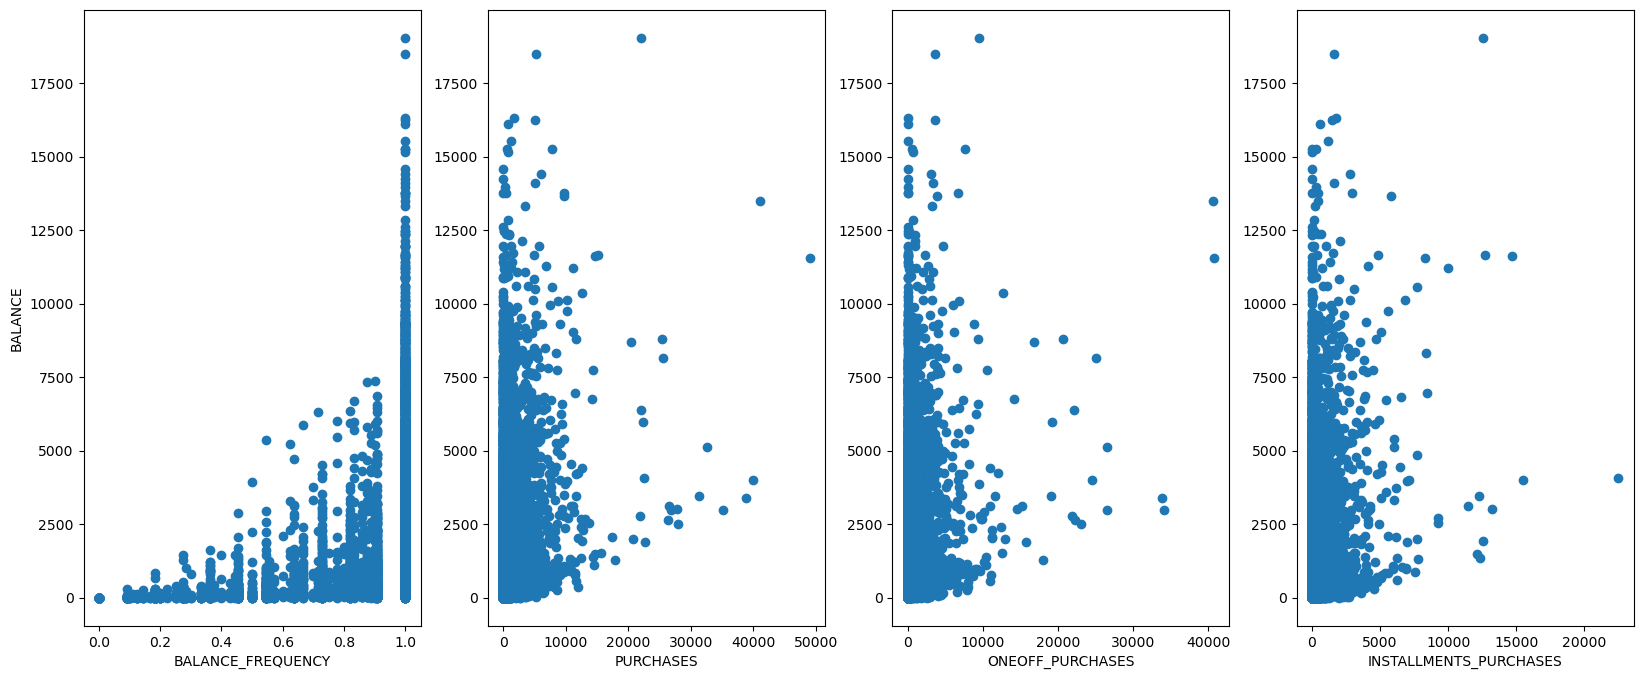

In [10]:
cols   = df.columns
fig , ax = plt.subplots(1,4, figsize = (20,8))
ax0, ax1, ax2, ax3 = ax.flatten() 

for i in range(0,4):
    
    X   = df[cols[i+2]]
    Y   = df[cols[1]]
    ax[i].plot(X, Y, marker = 'o', linestyle = "None")
    ax[i].set_xlabel(cols[i+2])
    ax[0].set_ylabel(cols[1])

as observed above the data contain outliers, we will be using Boxplots to identify these outliers in the data

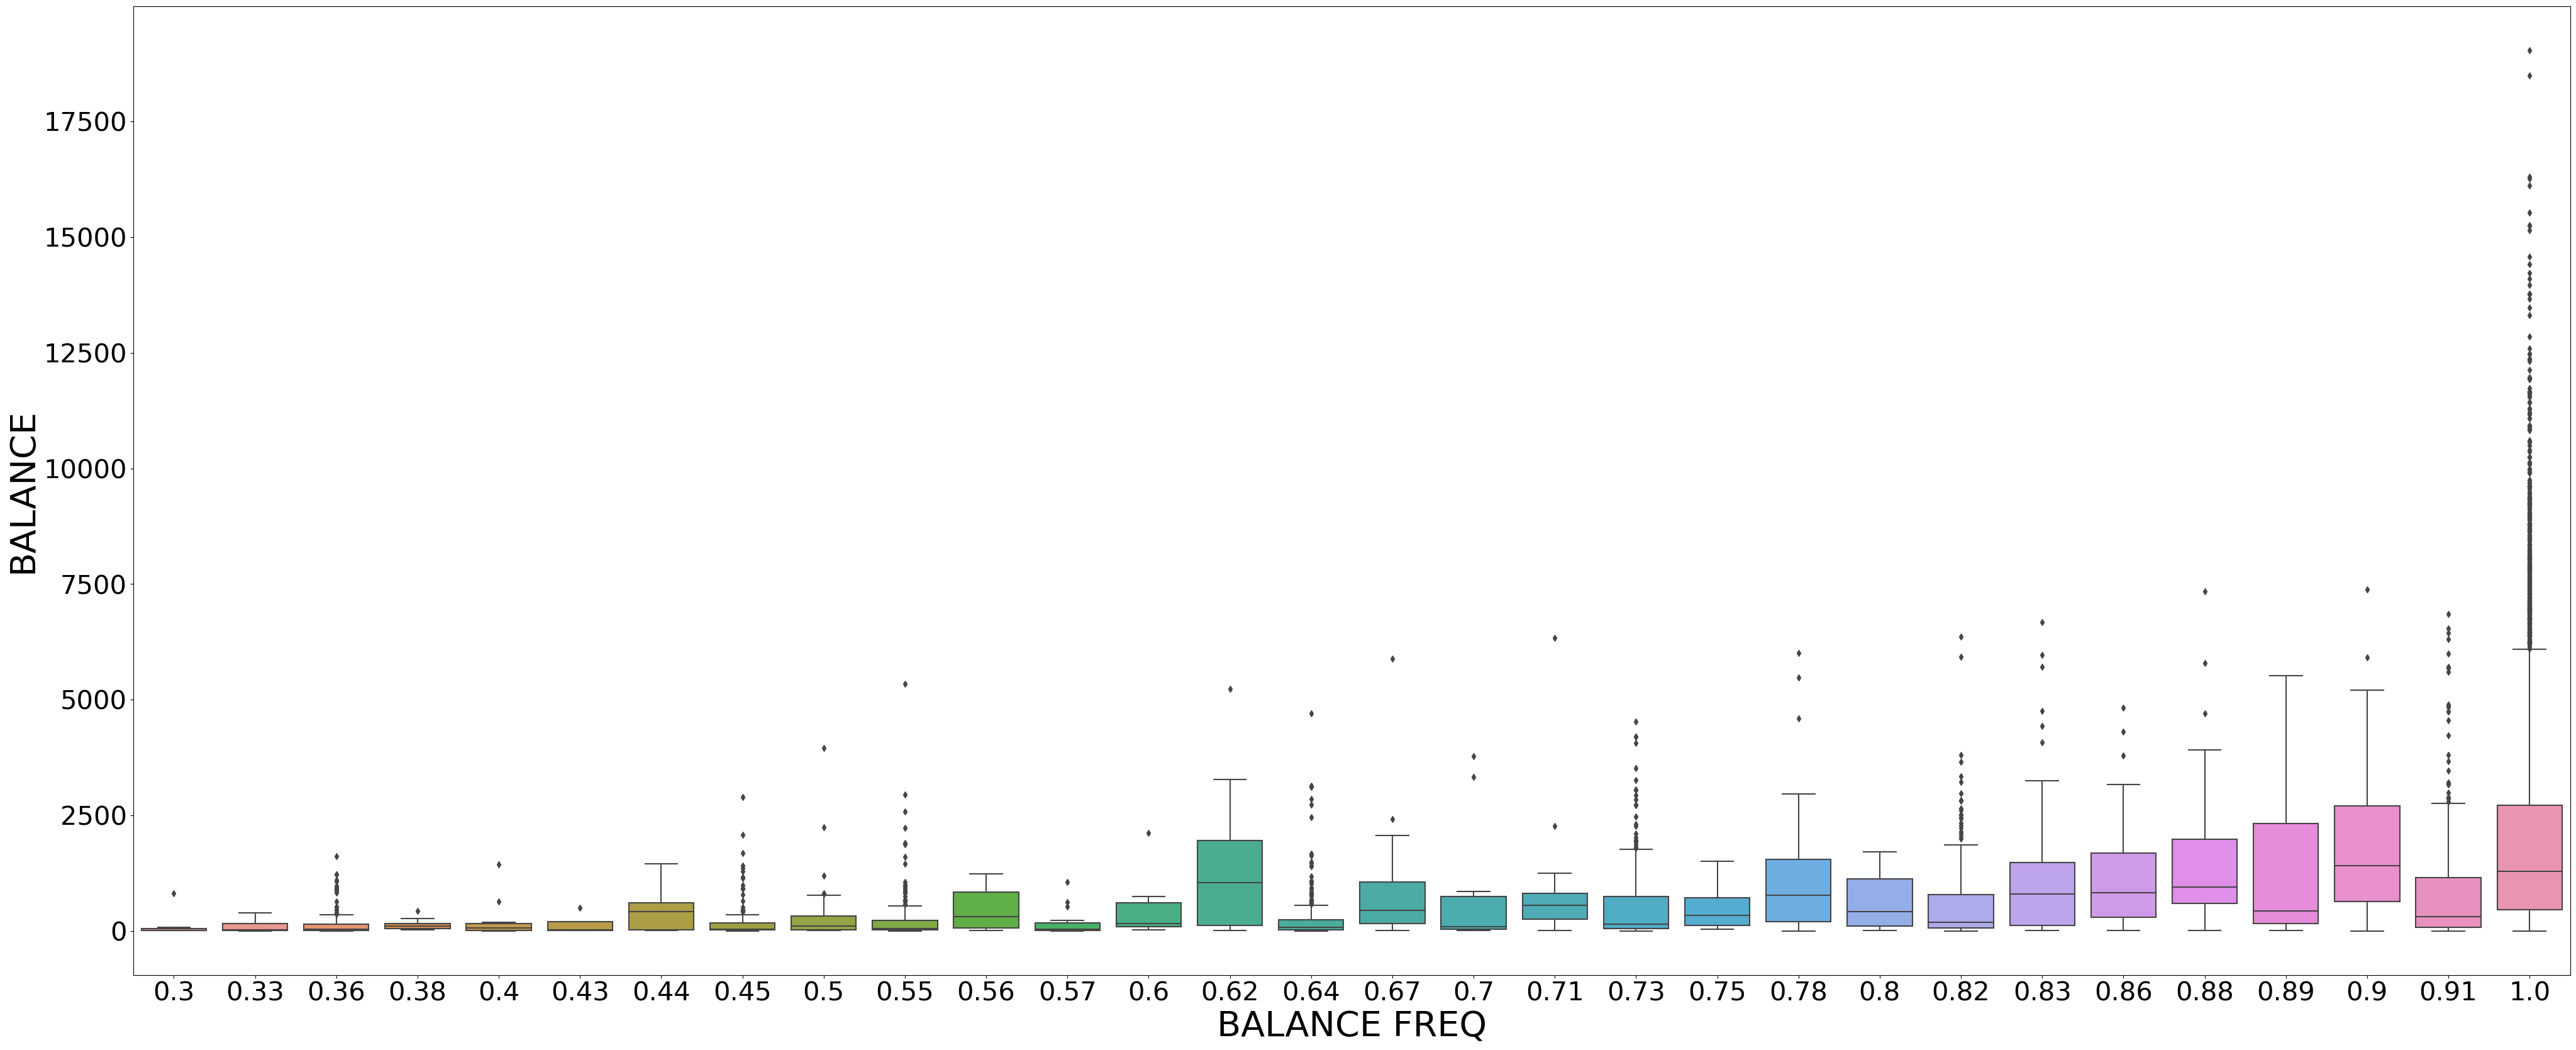

In [11]:
fig = plt.figure(figsize=(50, 20))
data_sub = df[(df['BALANCE_FREQUENCY'] >= 0.3)]
data_sub['BALANCE_FREQ'] = round(df['BALANCE_FREQUENCY'], 2)

sns.boxplot(x='BALANCE_FREQ', y='BALANCE', data=data_sub)
plt.xlabel('BALANCE FREQ', fontsize=40)
plt.ylabel('BALANCE', fontsize=40)
plt.tick_params(labelsize=30)


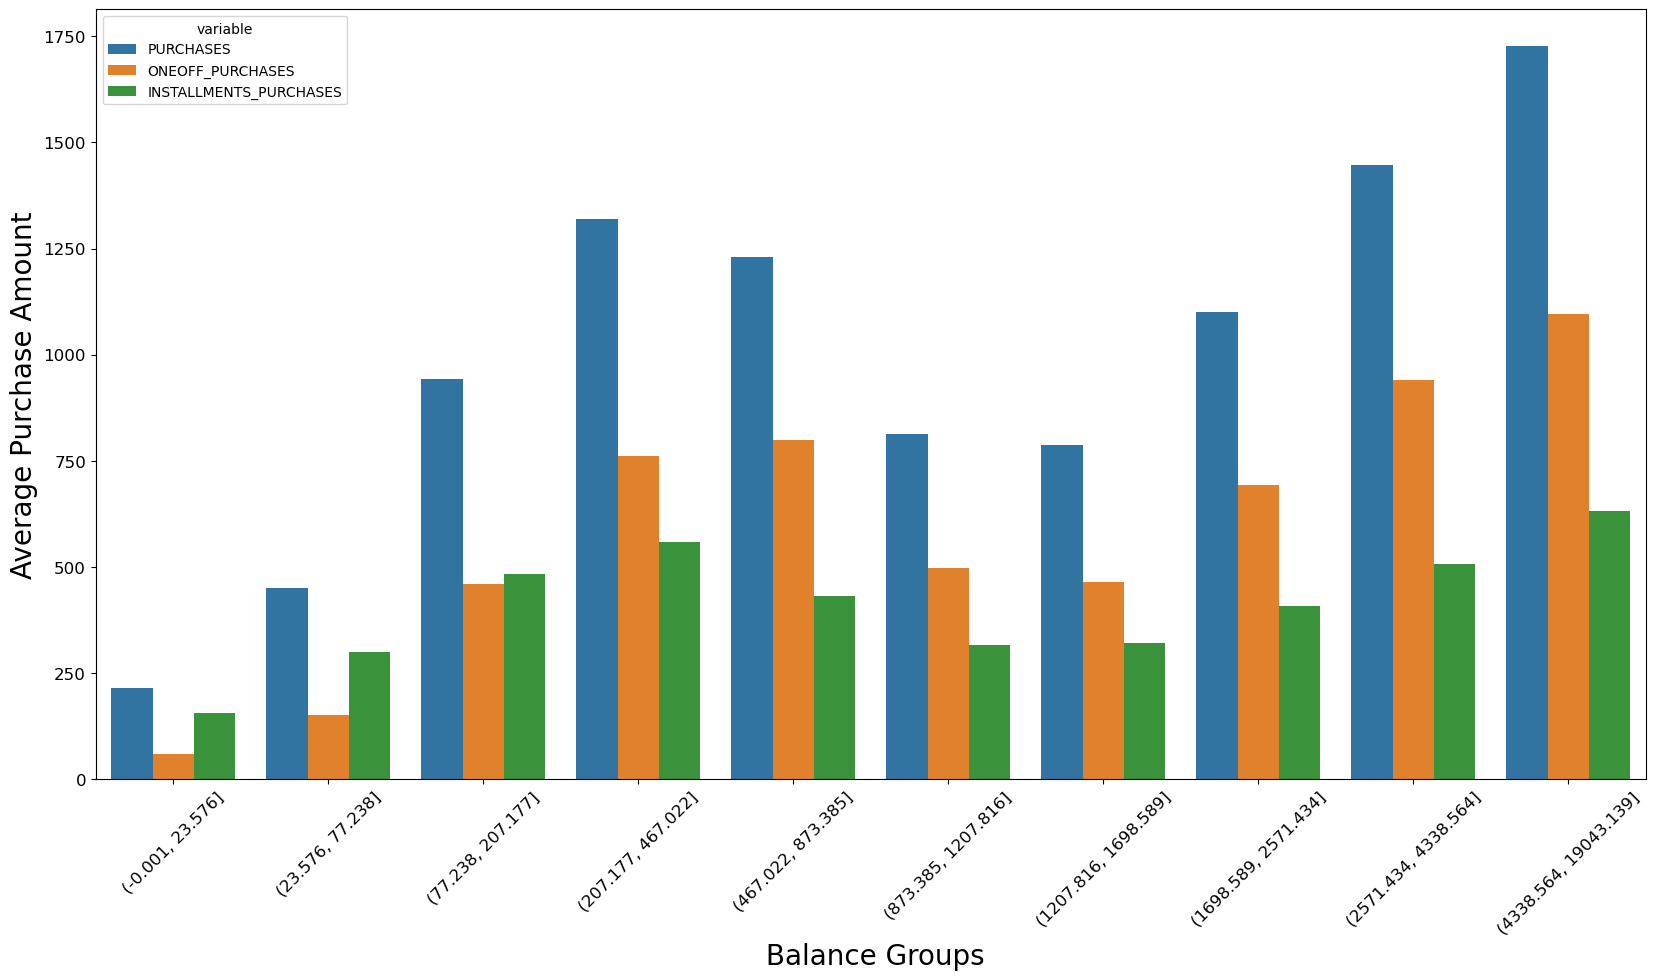

In [12]:
df['Balance_decile'] = pd.qcut(df['BALANCE'], q=10)
data_grp   = df.groupby('Balance_decile', as_index=False).mean()
data_grp   = data_grp[['Balance_decile', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]
data_grp_t = pd.melt(data_grp, id_vars = 'Balance_decile')

fig = plt.figure(figsize=(20,10))
sns.barplot(x= "Balance_decile" , y = "value", hue = 'variable', data =data_grp_t)
plt.ylabel("Average Purchase Amount", fontsize=20)
plt.xlabel(" Balance Groups", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

We see that customers having Balance in the mid-range have more average purchases, one-off purchases compared to customers having Balances in the 50–75th percentile.

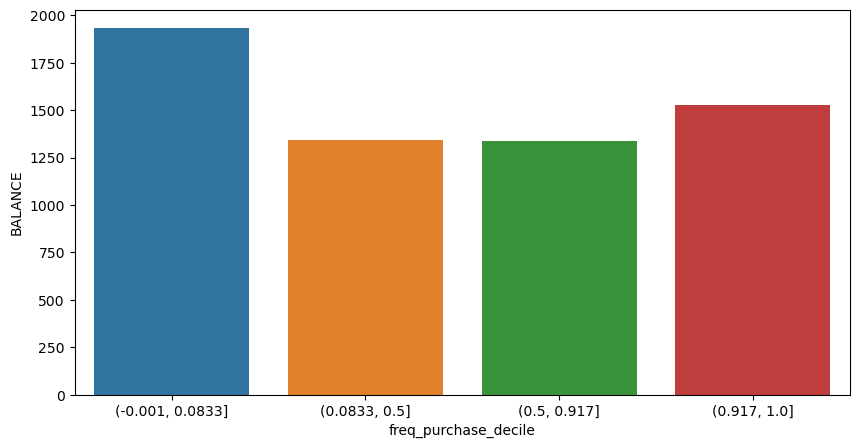

In [13]:
df['freq_purchase_decile'] = pd.qcut(df['PURCHASES_FREQUENCY'], q=4)

data_bal   = df.groupby('freq_purchase_decile', as_index=False).mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "freq_purchase_decile" , y = "BALANCE", data =data_bal)
plt.show()

Customers with lesser frequency of purchases have more average Balance compared to customers who have a higher frequency of purchases.

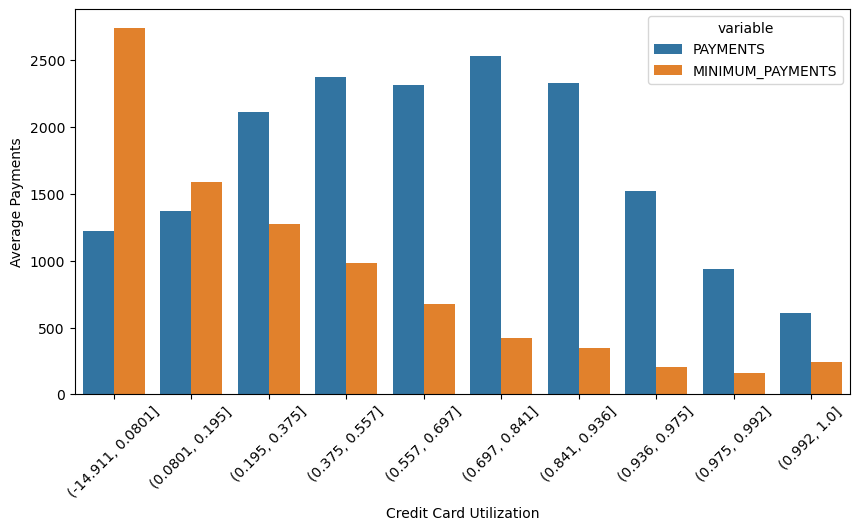

In [14]:
df['CREDIT_LIMIT'].fillna(1, inplace=True)
df['CC_utilisation']     = (df['CREDIT_LIMIT'] - df['BALANCE'])/df['CREDIT_LIMIT']

df['CC_util_decile']     = pd.qcut(df['CC_utilisation'], q=10)
data_cc_grp                 = df.groupby('CC_util_decile', as_index=False).mean()
data_cc_grp                 = data_cc_grp[['CC_util_decile', 'PAYMENTS' , 'MINIMUM_PAYMENTS']]
data_cc_grp_t               = pd.melt(data_cc_grp, id_vars = 'CC_util_decile')

fig = plt.figure(figsize=(10,5))
sns.barplot(x= "CC_util_decile" , y = "value", hue = "variable" ,data =data_cc_grp_t)
plt.xlabel("Credit Card Utilization")
plt.ylabel("Average Payments")
plt.xticks(rotation=45)
plt.show()

Since, there are outliers in our data we would be creating bins and then do a k-means clustering.

In [15]:
data_n  = df.copy()

cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','CASH_ADVANCE',
         'CREDIT_LIMIT', 'PAYMENTS']
for c in cols:
    bins = c+'_bin'
    max_ = max(data_n[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,500,1000,3000,5000,10000,15000,max_],labels = [1,2,3,4,5,6,7], include_lowest= True)
cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY']
for c in cols:
    bins = c+'_bin'
    max_ = max(df[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,max_],labels = [1,2,3,4,5,6,7,8,9,10], include_lowest= True)

cols = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX']

for c in cols:
    bins = c+'_bin'
    max_ = max(df[c])
    data_n[bins] = pd.cut(data_n[c], bins=[0,20,40,60,80,100,max_],labels = [1,2,3,4,5,6], include_lowest= True)

Now we will drop some variables 

In [16]:
data_model  = data_n.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Balance_decile',
       'freq_purchase_decile', 'CC_utilisation', 'TENURE', 'PURCHASES_TRX_bin', 'CASH_ADVANCE_TRX_bin','CC_util_decile'], axis=1)

In [17]:
data_model.shape

(8950, 11)

Standardizing these variables for clustering purpose

Text(0.5, 1.0, 'Elbow Curve')

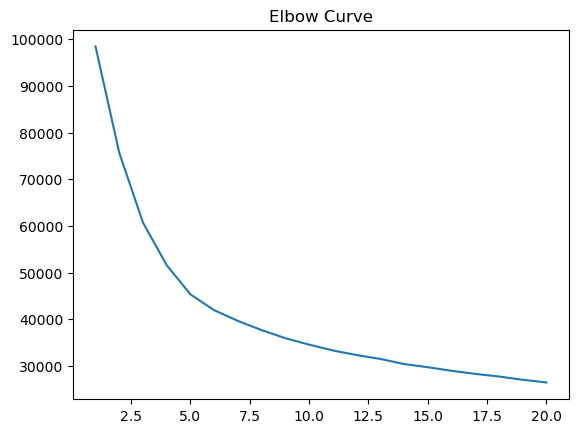

In [18]:
stand_         = StandardScaler()
data_model_std = stand_.fit_transform(data_model)

random.seed(37)
n_clusters=20
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(data_model_std)
    sse.append([i, kmean.inertia_])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

As a general rule, we see that the Sum of Squared Distance between Centroids (SSE) becomes flat at around 8 clusters. We will be taking 8 clusters initially and run k-means.

In [19]:
random.seed(10)
kmean= KMeans(8)
kmean.fit(data_model_std)
y_kmeans = kmean.predict(data_model_std)
data_model['Cluster']       = y_kmeans
data_model_std              = pd.DataFrame(data_model_std)
data_model_std['Cluster']   = y_kmeans

Now we will calculate the silhouette score for the model

In [20]:

silhouette_avg = silhouette_score(data_model_std, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3757606624287858


Now, visualizing the clusters and analyze if these can be combined.

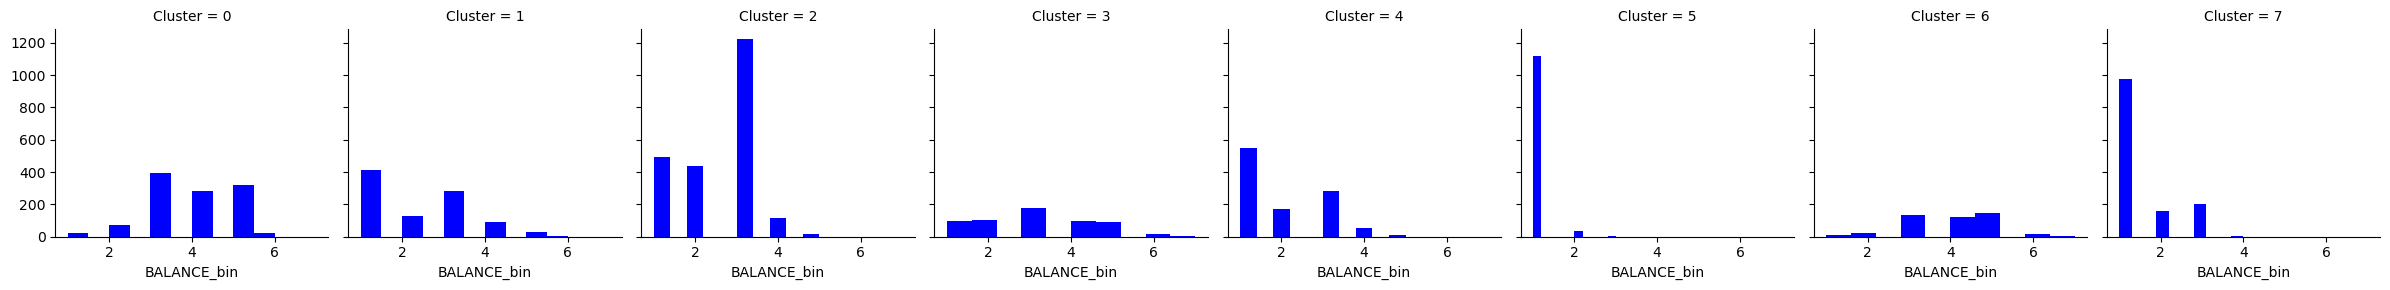

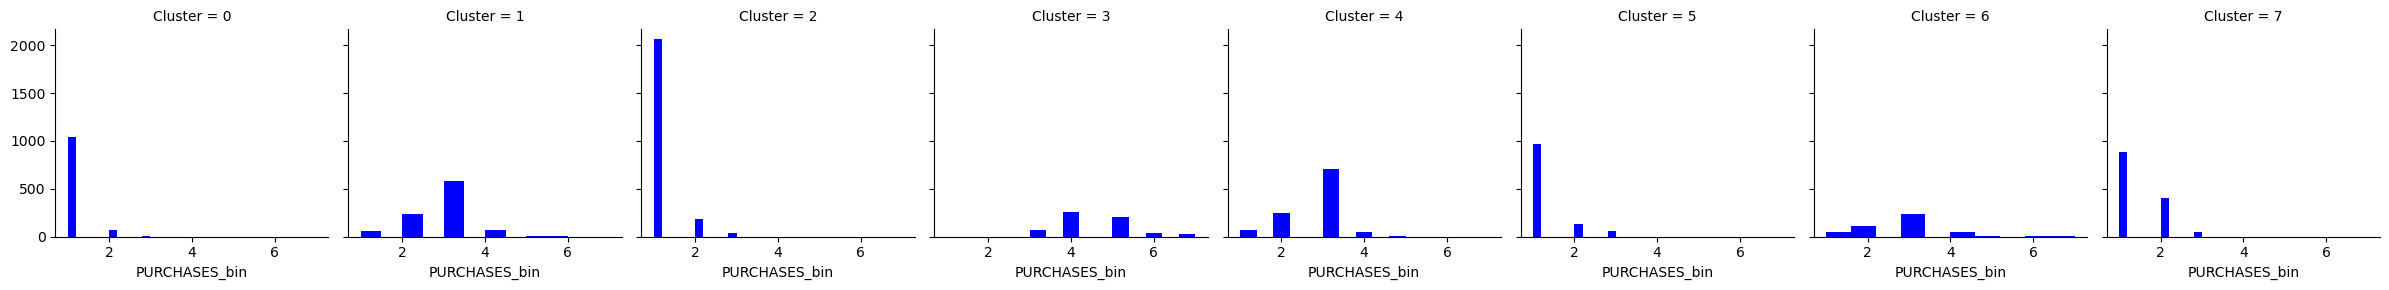

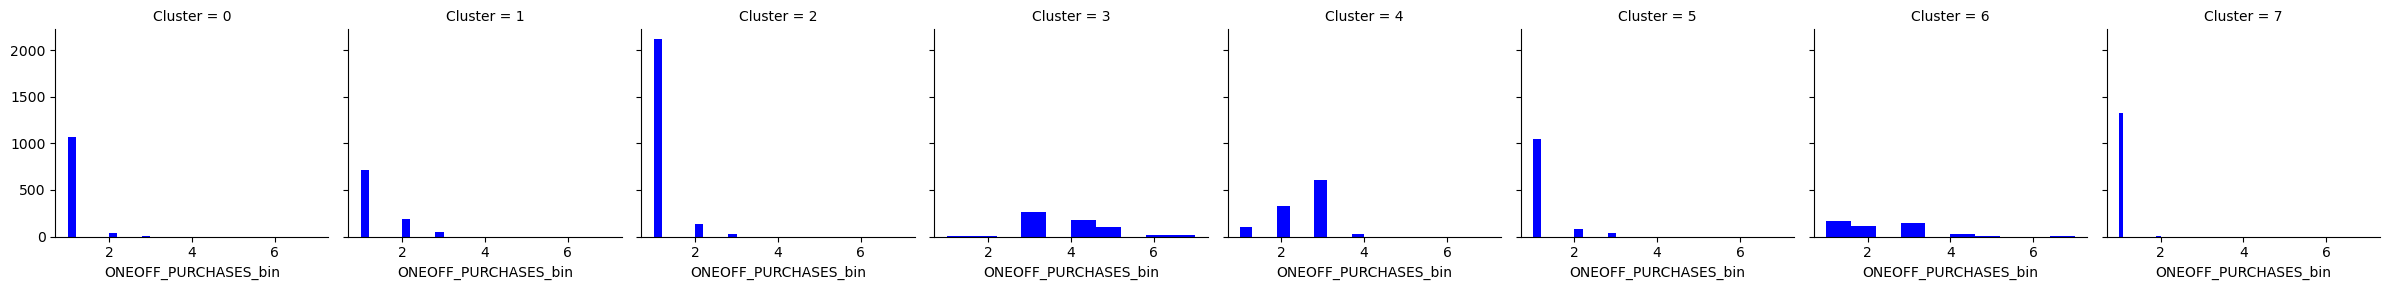

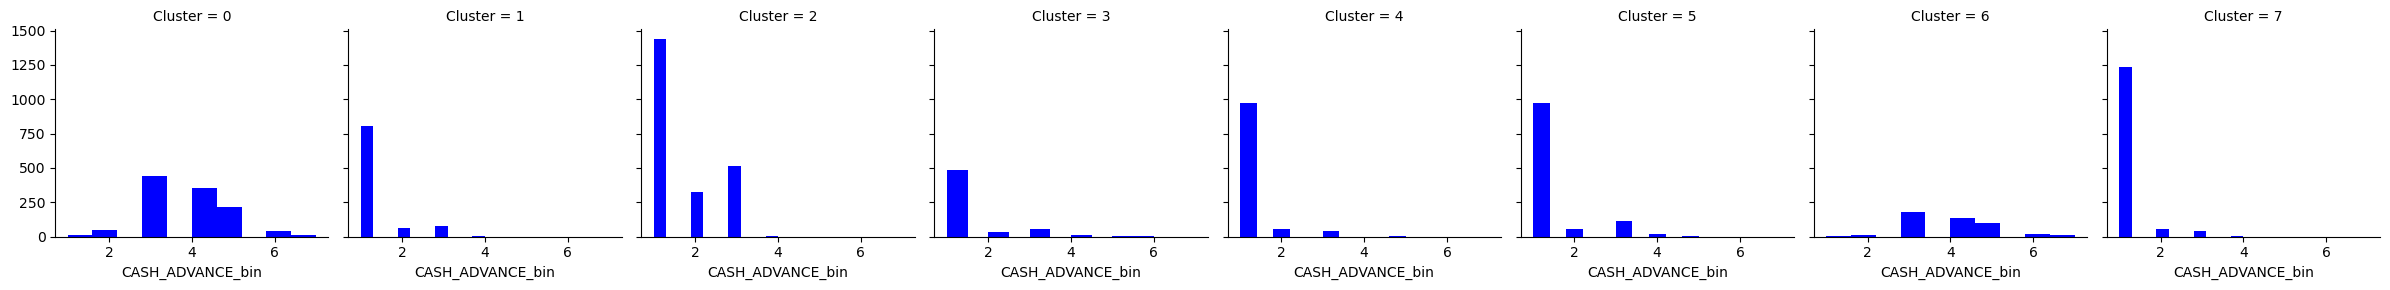

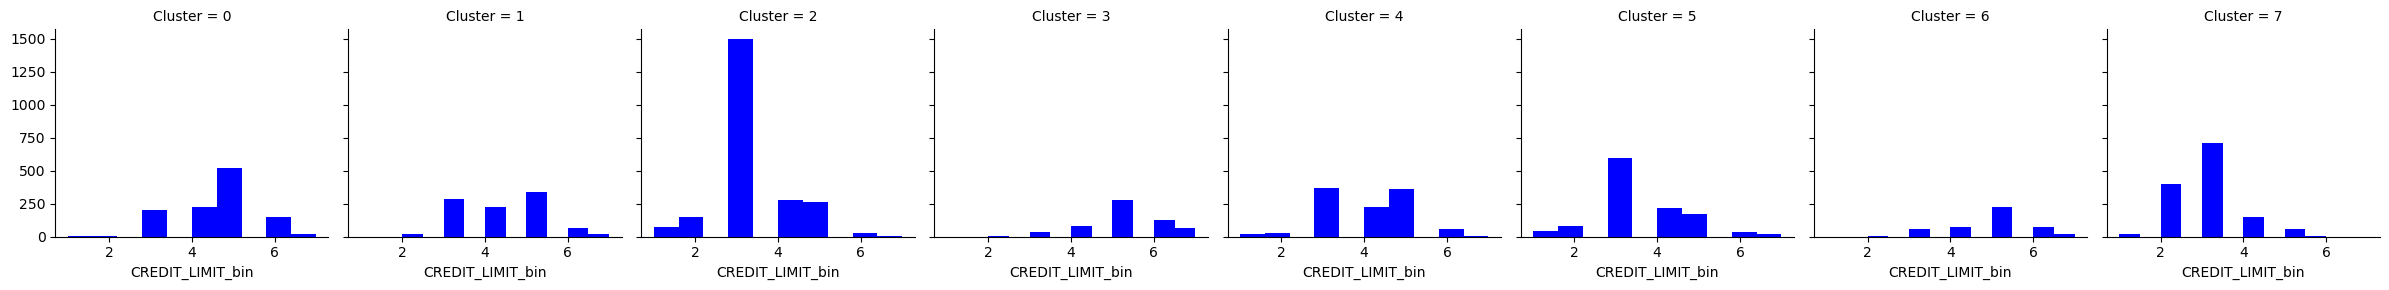

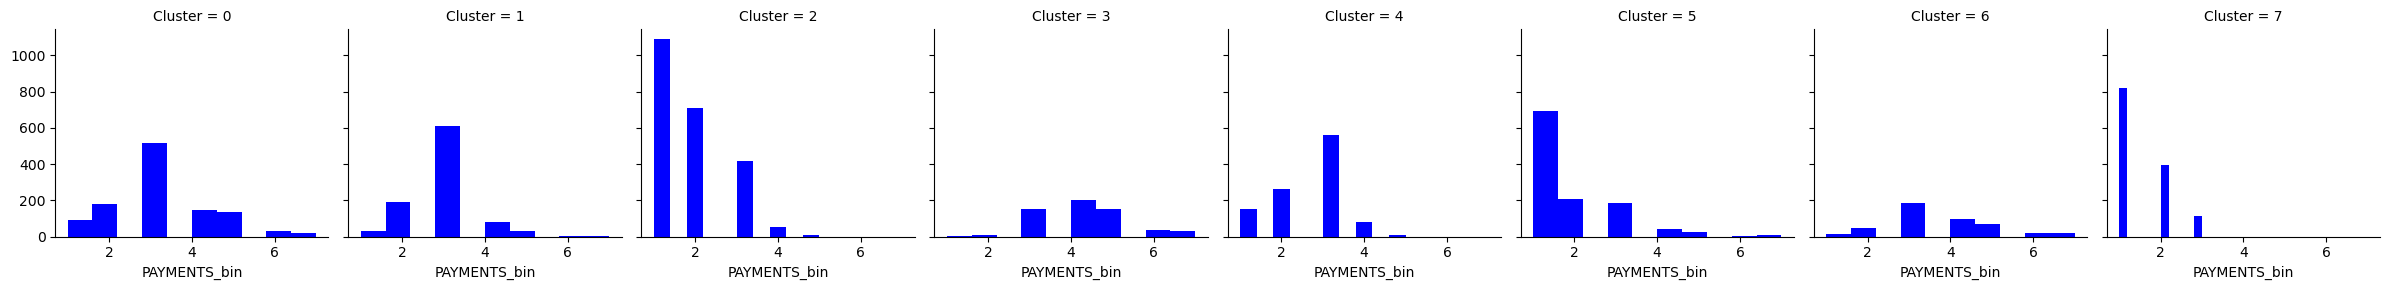

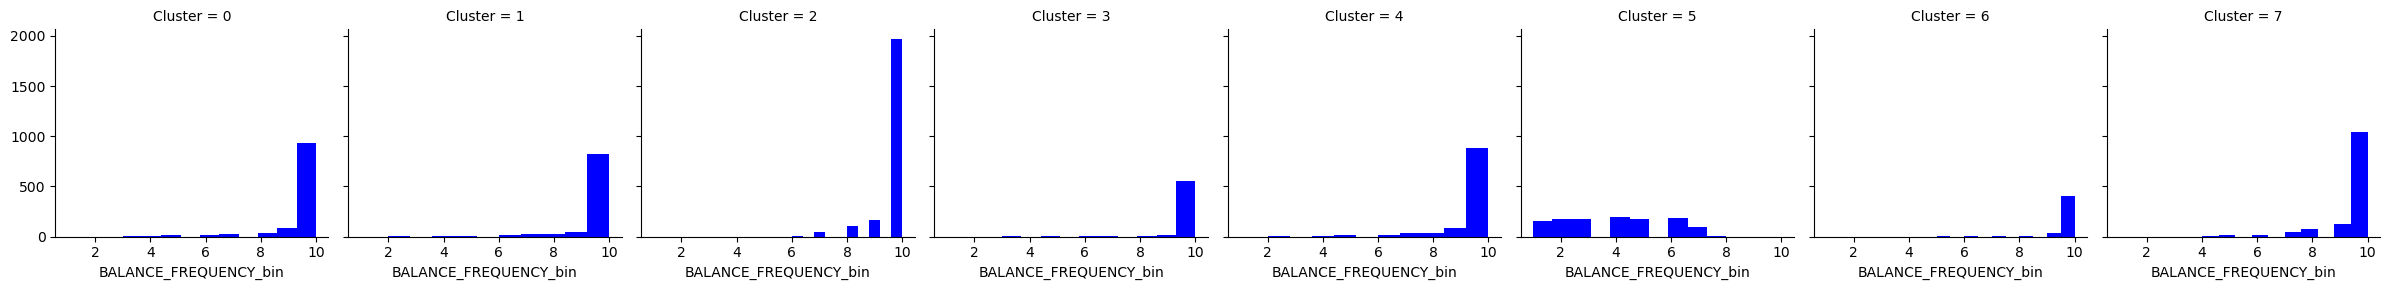

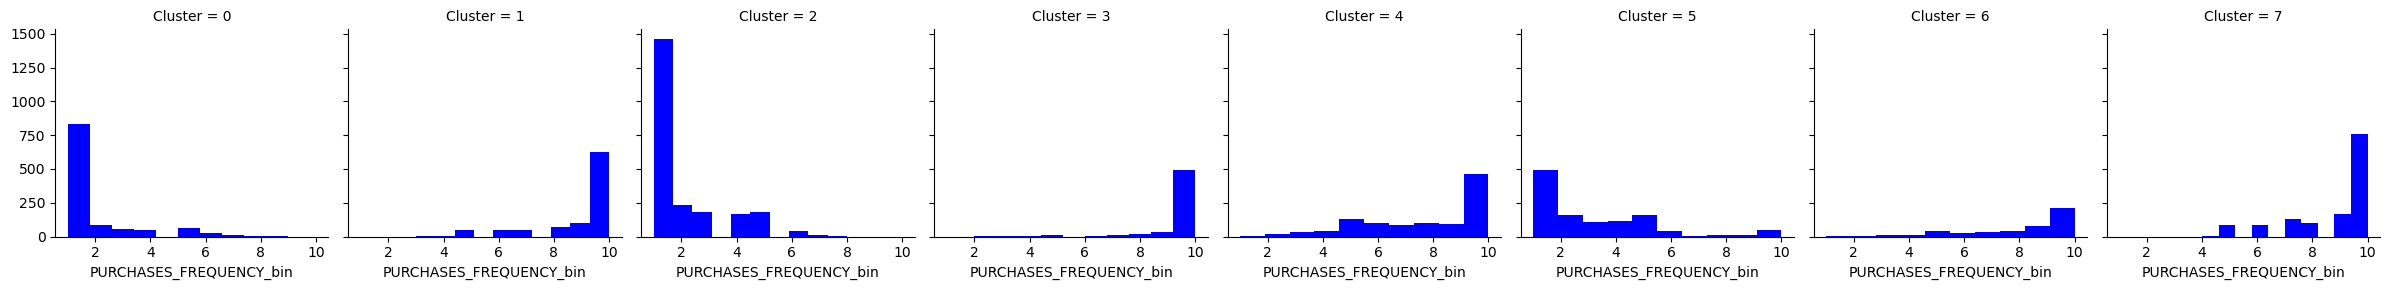

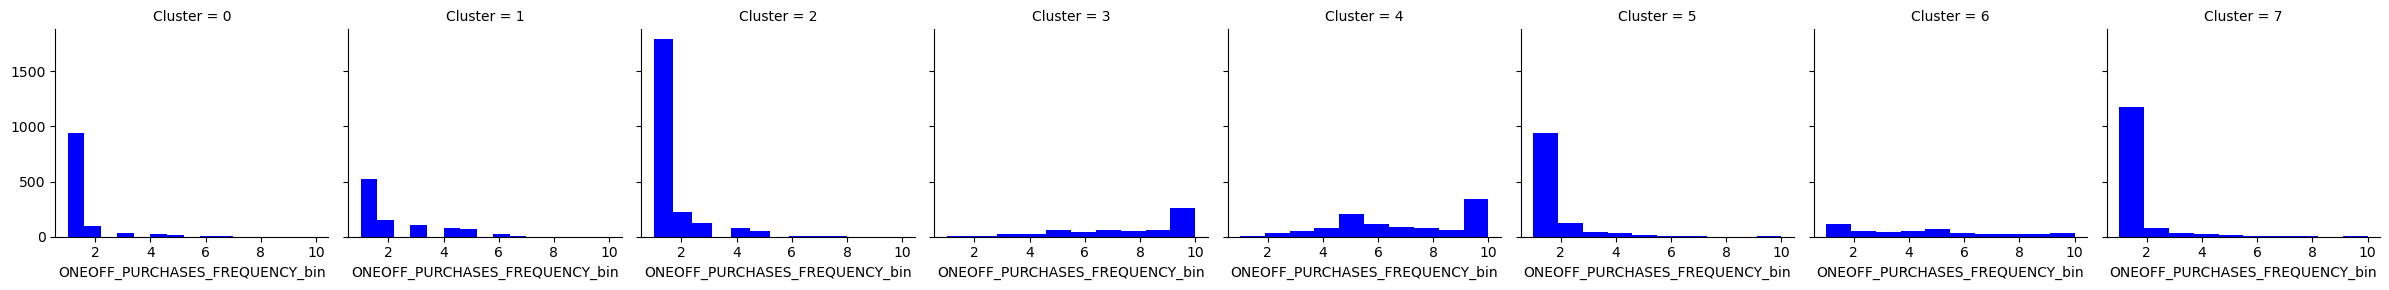

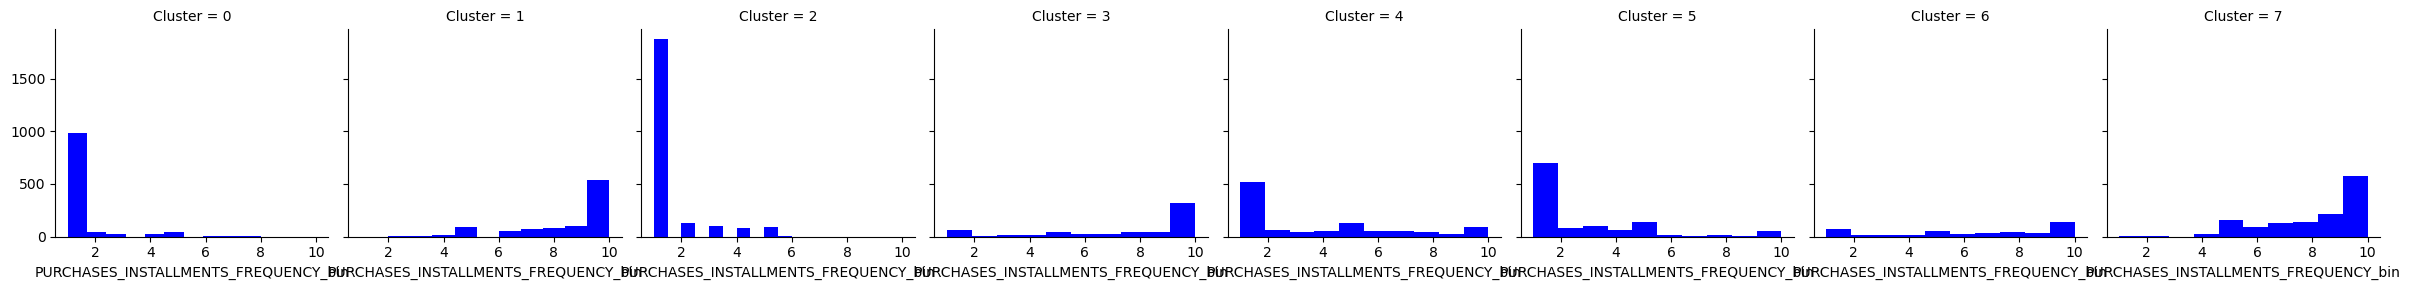

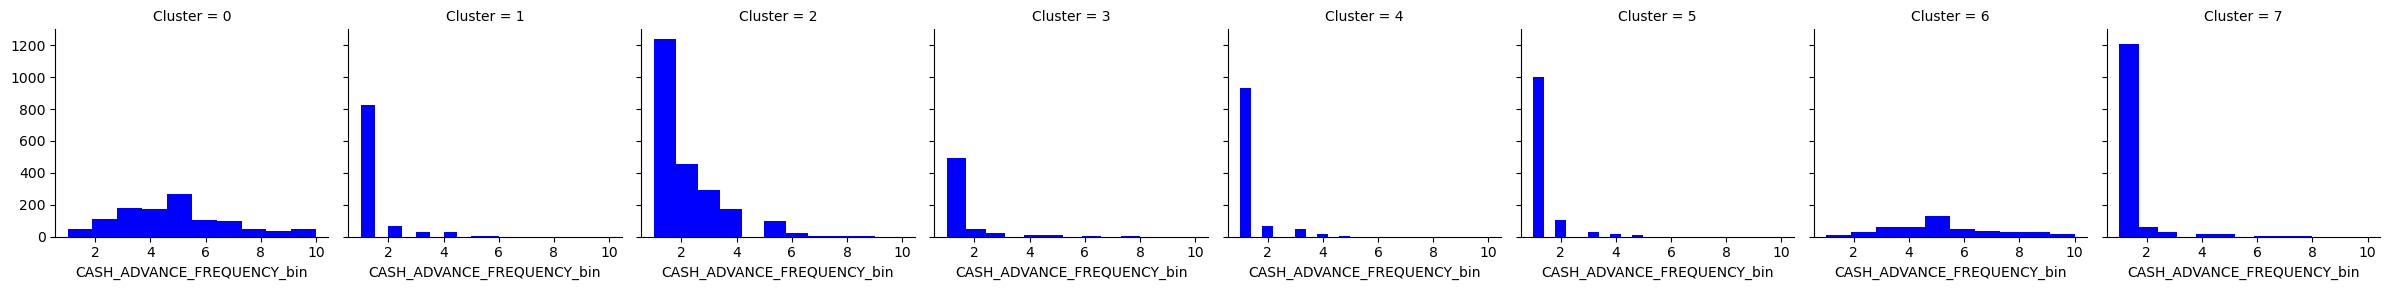

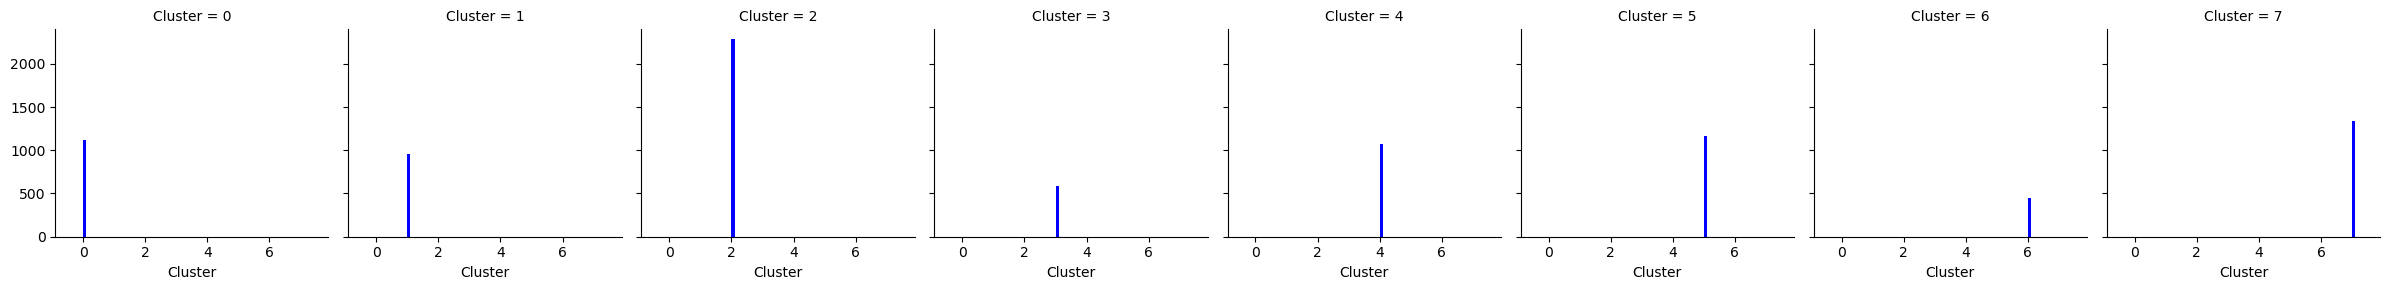

In [21]:
for c in data_model:
    g   = sns.FacetGrid(data_model, col='Cluster')
    g.map(plt.hist, c, color = "blue")

<br>Looking at the data distribution for all these 8 clusters, we can combine some and visualize them.<br>

<br>Cluster 1 and Cluster 3 could be combined as we see most of the variables have the same distribution and skewness.<br>

<br>Cluster 0 and Cluster 2 can also be combined when we see distributions of variables.<br>

<br>Similarly, Cluster 4 and Cluster 5 can also be combined based on the distribution of variables in these clusters.<br>

In [22]:
data_model["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)
data_model_std["Cluster"].replace({3: 1, 2: 0, 5:4}, inplace=True)
clusters_   = data_model["Cluster"]

<br>Visualizing the clusters in 2-D<br>

<br>However, when working with data that has multiple variables or dimensions, it becomes challenging to visualize the relationships between the variables directly, so we would be doing a Principal Component Analysis (PCA) to get principal components which will be a combination of all the variables we have taken to do clustering.<br>

Text(0, 0.5, 'Cumulative Variance Explained')

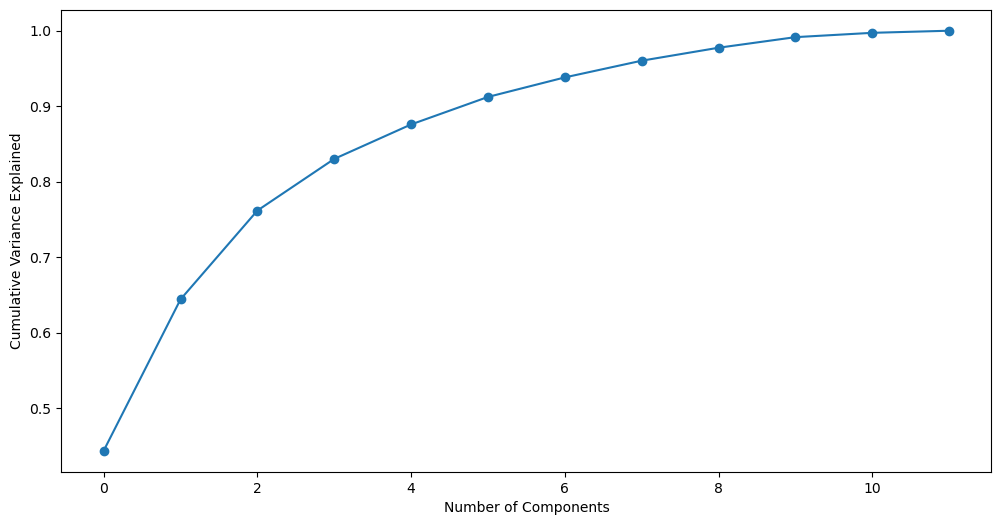

In [23]:
random.seed(10)
pca = PCA()
pca.fit(data_model_std)
fig = plt.figure(figsize =(12,6))
plt.plot(range(0,12),pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = "-")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")

This plot showing the cumulative variance explained by each principal component, allowing you to assess the contribution of each component to the overall variance in the data. We conclude the number of Principle Component as 4 because we can observe a steep decile after that point.

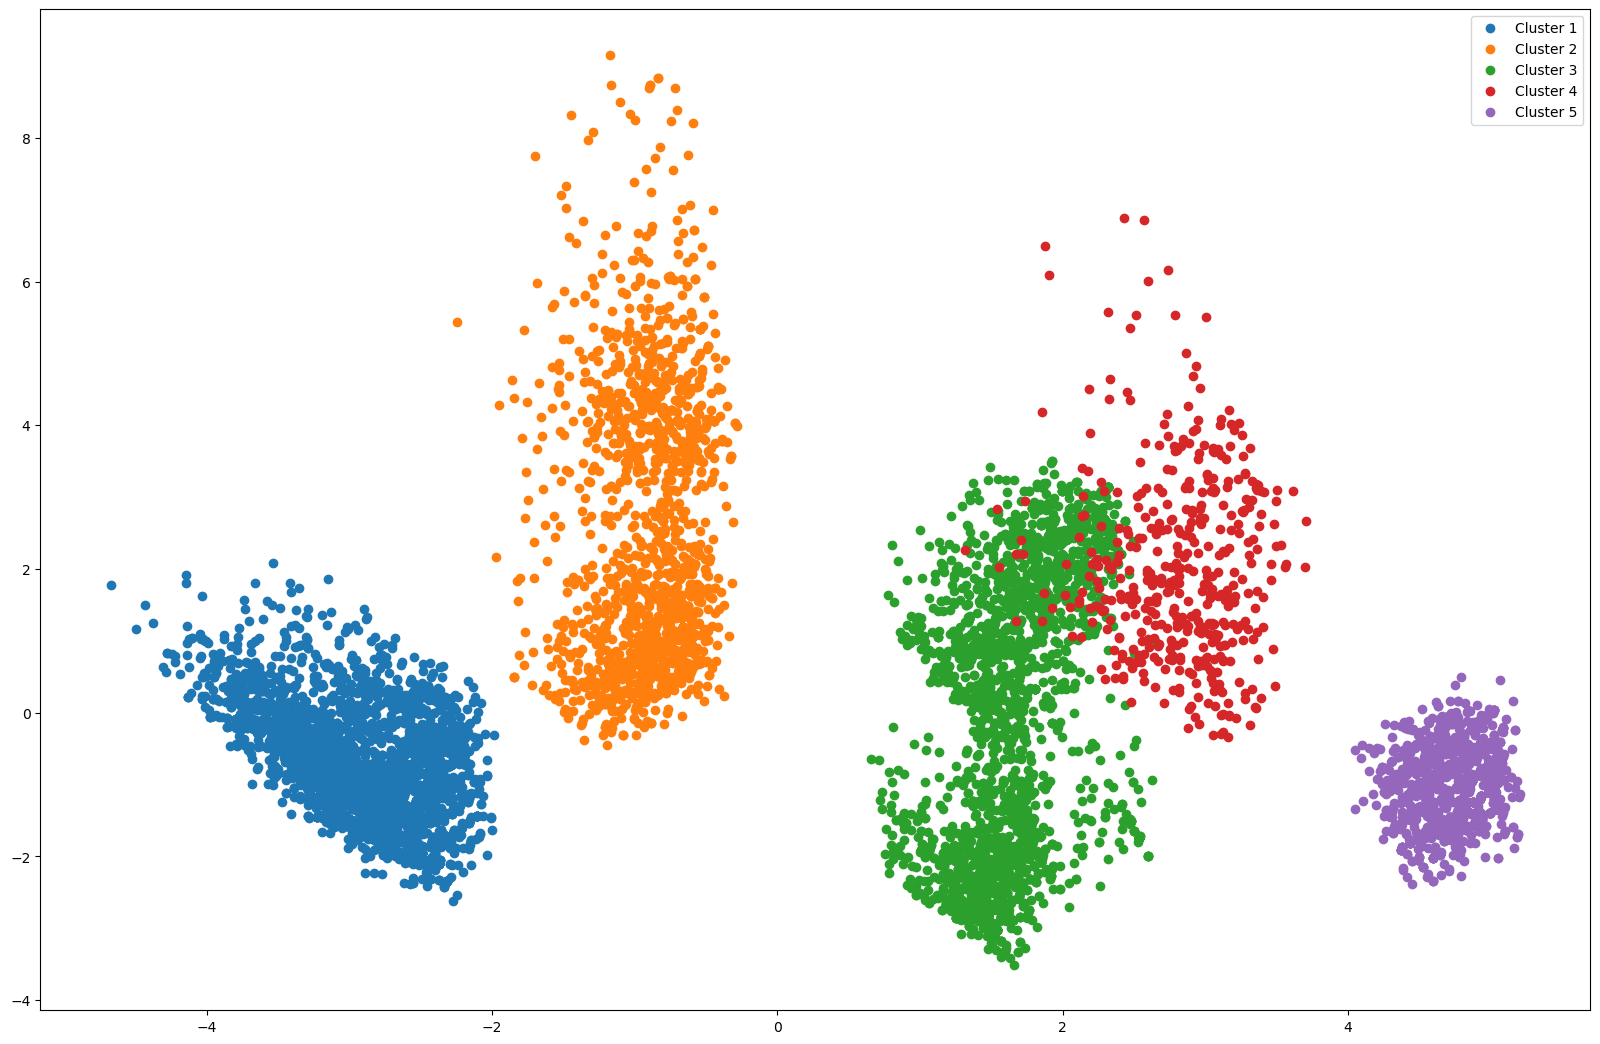

In [25]:
pca = PCA(n_components = 4)
pca.fit(data_model_std)

scores = pca.transform(data_model_std)


x,y = scores[:,0] , scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':clusters_})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {0: 'Cluster 1', 
         1: 'Cluster 2', 
         4: 'Cluster 3',
         6: 'Cluster 4',
         7: 'Cluster 5'}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()

Creating a visualization in 3D with Plotly. This help us to get a better view at the clustering that we have created.

In [26]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

x,y,z = scores[:,0] , scores[:,1], scores[:,2]

df_data = pd.DataFrame({'x': x, 'y':y, 'z':z, 'clusters':clusters_})

Creating an interactive Plotly chart.

In [27]:
# Visualize cluster shapes in 3d.

cluster1=df_data.loc[df_data['clusters'] == 0]
cluster2=df_data.loc[df_data['clusters'] == 1]
cluster3=df_data.loc[df_data['clusters'] == 4]
cluster4=df_data.loc[df_data['clusters'] == 6]
cluster5=df_data.loc[df_data['clusters'] == 7]


scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.to_numpy()[:,0], y = cluster1.to_numpy()[:,1], z = cluster1.to_numpy()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.to_numpy()[:,0], y = cluster2.to_numpy()[:,1], z = cluster2.to_numpy()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.to_numpy()[:,0], y = cluster3.to_numpy()[:,1], z = cluster3.to_numpy()[:,2],
    marker = dict( size=2, color='red')
)

scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.to_numpy()[:,0], y = cluster4.to_numpy()[:,1], z = cluster4.to_numpy()[:,2],
    marker = dict( size=2, color='orange')
)

scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.to_numpy()[:,0], y = cluster5.to_numpy()[:,1], z = cluster5.to_numpy()[:,2],
    marker = dict( size=2, color='yellow')
)


################## Clusters  ##############

cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.to_numpy()[:,0], y = cluster1.to_numpy()[:,1], z = cluster1.to_numpy()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.to_numpy()[:,0], y = cluster2.to_numpy()[:,1], z = cluster2.to_numpy()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.to_numpy()[:,0], y = cluster3.to_numpy()[:,1], z = cluster3.to_numpy()[:,2],
    color='red', showscale = True
)

cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.to_numpy()[:,0], y = cluster4.to_numpy()[:,1], z = cluster4.to_numpy()[:,2],
    color='orange', showscale = True
)

cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.to_numpy()[:,0], y = cluster5.to_numpy()[:,1], z = cluster5.to_numpy()[:,2],
    color='yellow', showscale = True
)

layout = dict(
    title = '3D visulization of Clusters',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, scatter5, cluster1, cluster2, cluster3, cluster4, cluster5], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

The next step is to profile the clusters for its consumption for the Credit Risk team and Strategy team which works collaboratively with Marketing Team.

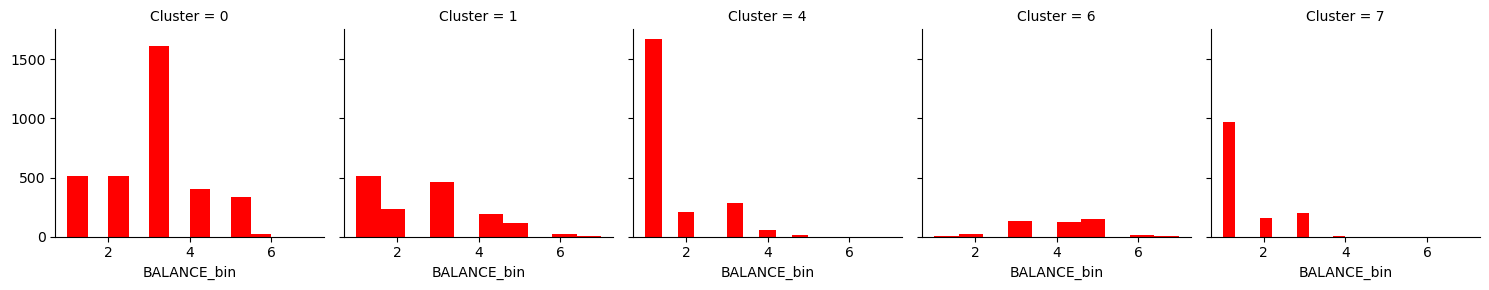

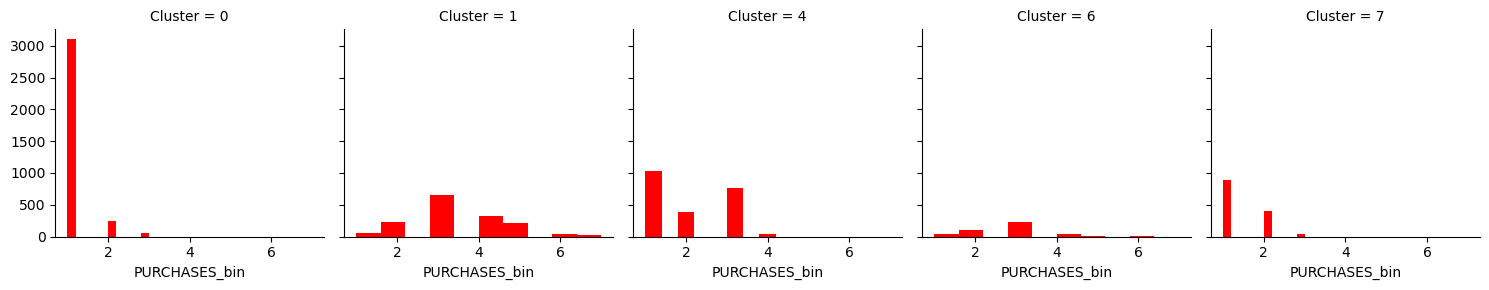

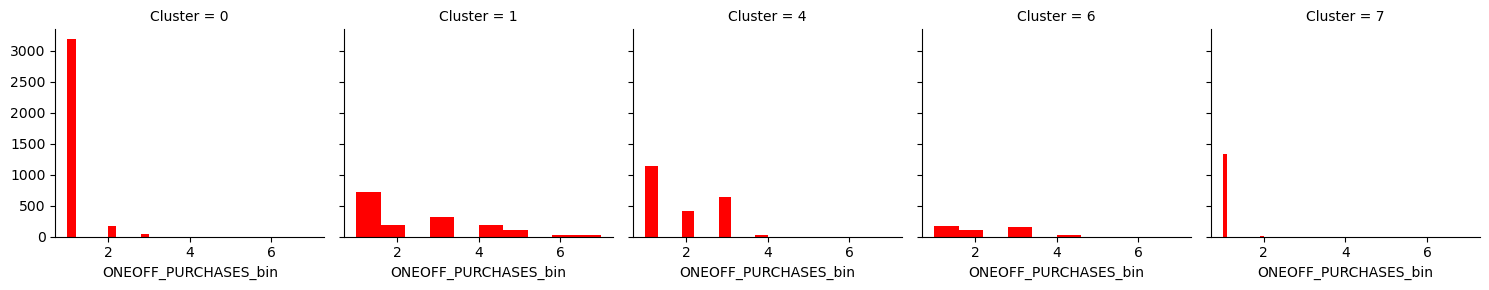

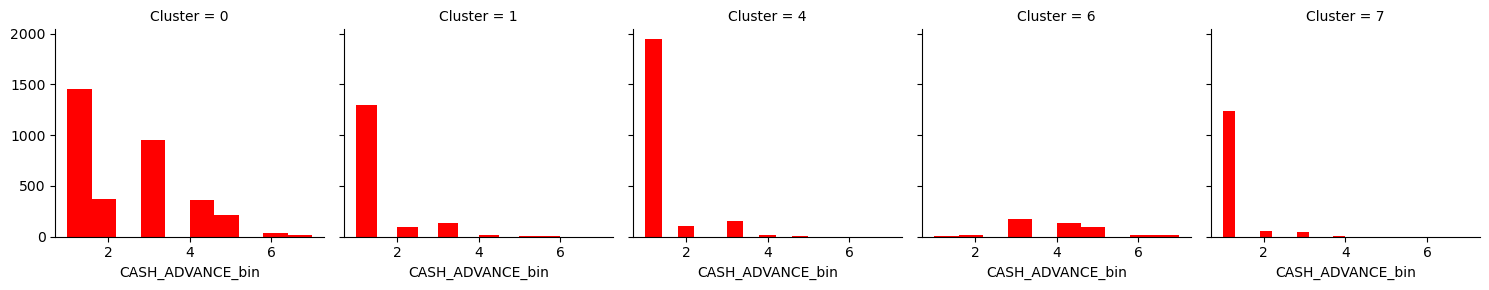

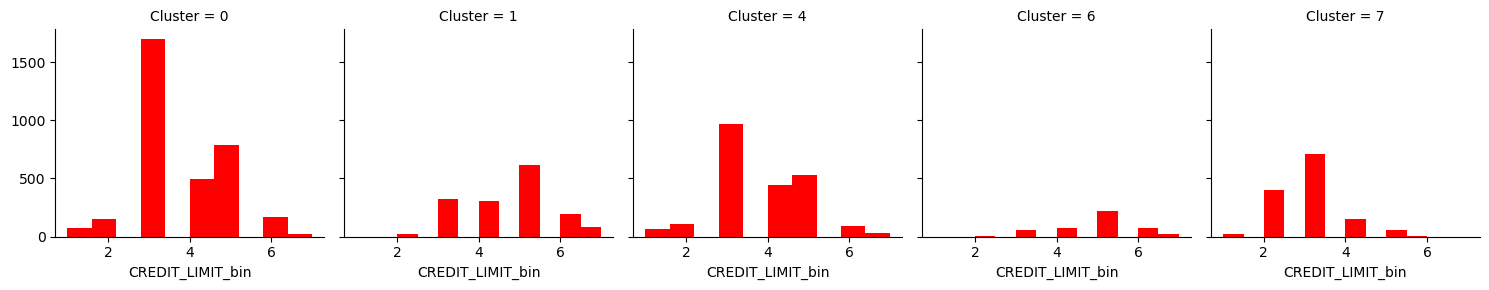

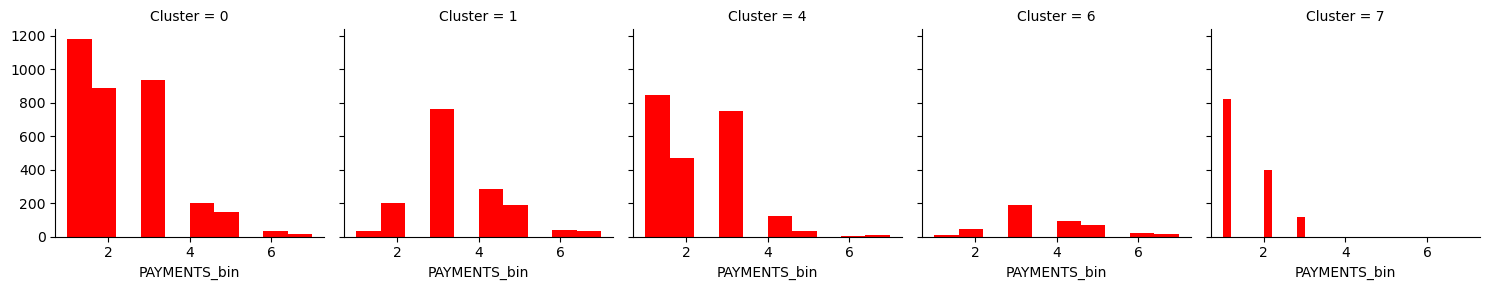

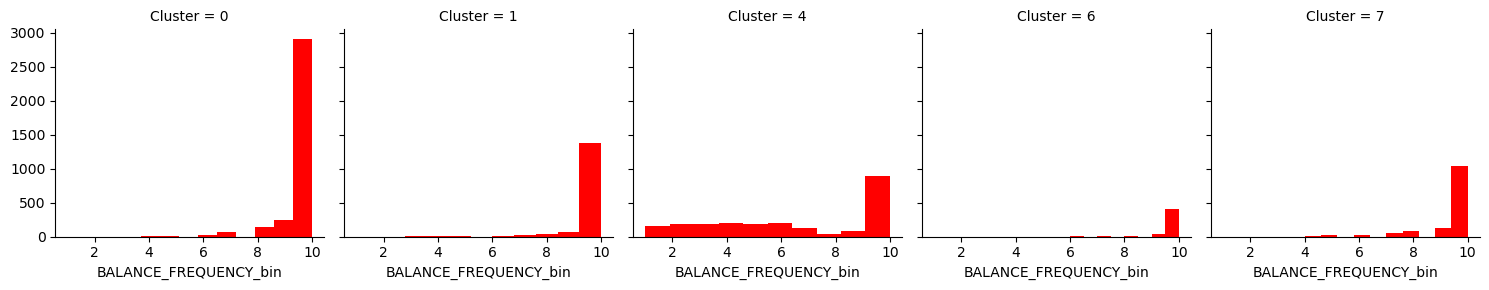

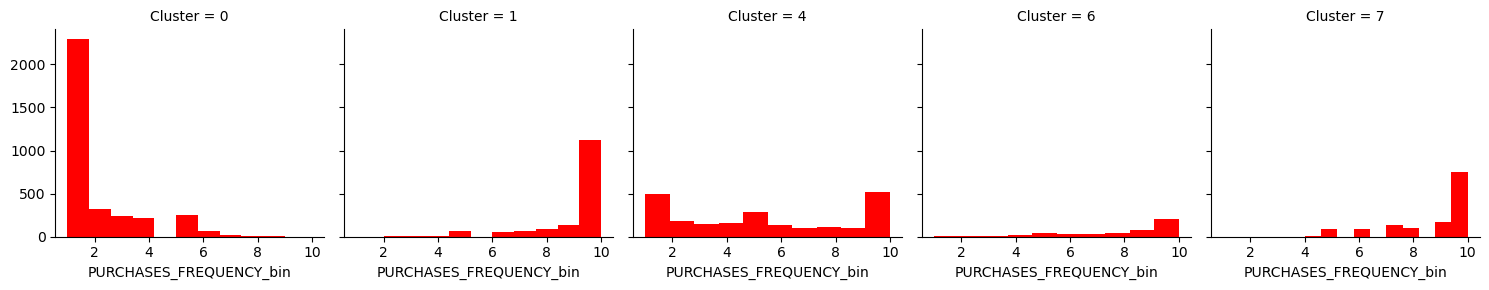

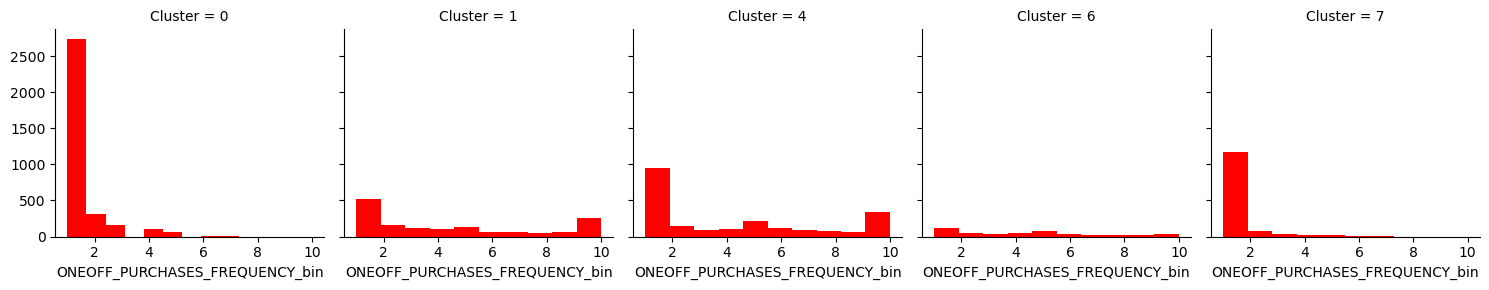

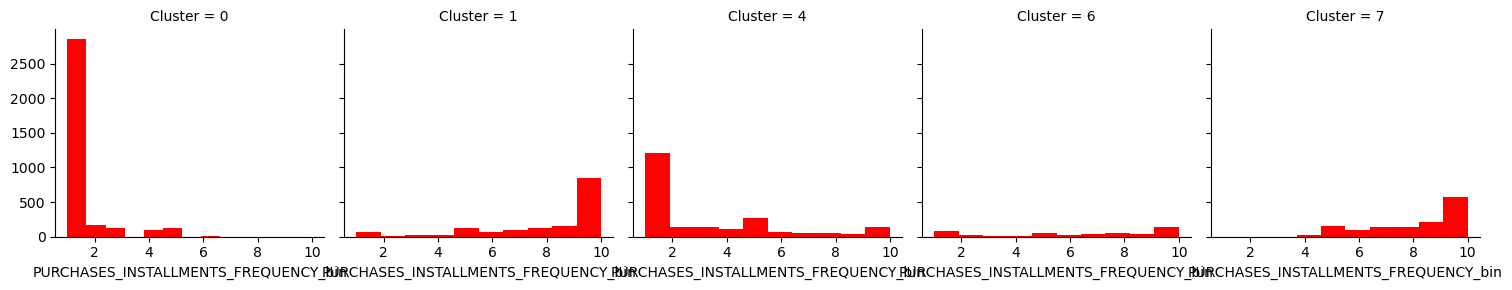

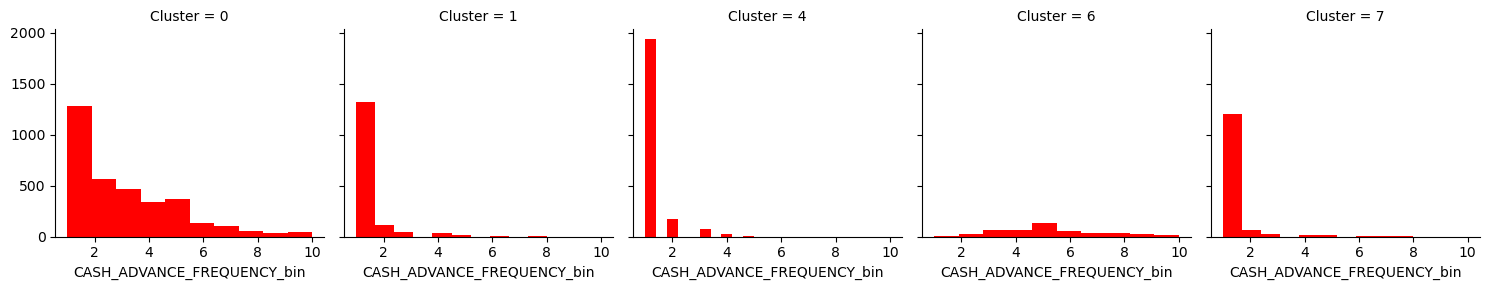

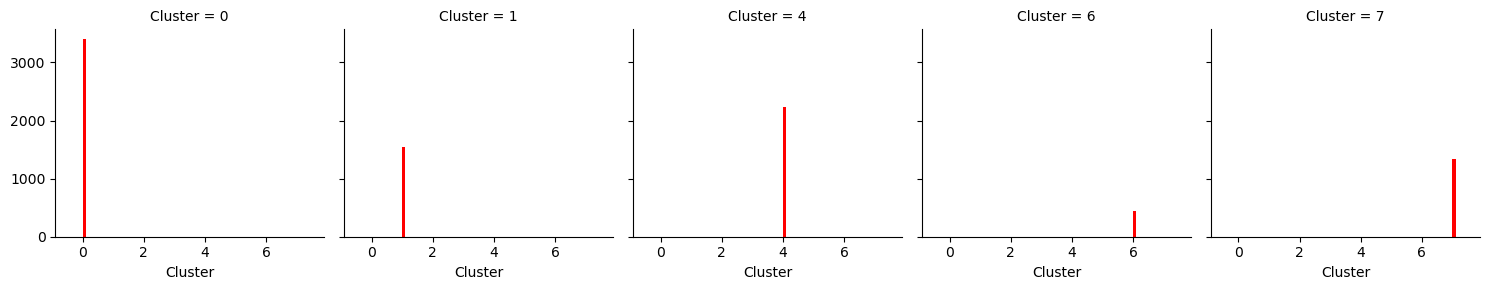

In [28]:
#fig  = plt.figure(figsize = (7200,30))
for c in data_model:
    g   = sns.FacetGrid(data_model, col='Cluster')
    g.map(plt.hist, c, color = "red")

<br>Seeing the distributions of the variables of all the clusters, the following is the profiling which one can do:<br>

<br>Cluster 0: Who do not purchase but have a good credit limit. Also, miss payments.<br>

<br>Cluster 1: Who have a good balance, make average purchases and do make payments.<br>

<br>Cluster 4: Who buys frequently and have a high credit limit.<br>

<br>Cluster 6: Who buys very small, keeps low balance but frequently pay dues.<br>

<br>Cluster 7: Who only buys in installments.<br>

<br>It’s quite interesting to study the Credit Card behavior of customers and take action on them.<br>

<br>The Risk team can talk to the collections team to be cautious of Cluster 0 while the Marketing team can contact Cluster 1 & Cluster 4.<br>

<br>Even Cluster 7 could also be targeted with different Merchant offers on Electronics, Mobiles, Furniture or Travel.<br>